### Pandas Tutorial: Data analysis with Python: Part 2

#### Analyzing Thanksgiving Dinner Trends with Python

We covered a lot of ground in Part 1 of our pandas tutorial. 

We went from the basics of pandas DataFrames to indexing and computations. If you’re still not confident with Pandas, you might want to check out the Dataquest pandas Course. 

In this tutorial, we’ll dive into one of the most powerful aspects of pandas — its grouping and aggregation functionality. With this functionality, it’s dead simple to compute group summary statistics, discover patterns, and slice up your data in various ways. 

We’ll use a dataset on what Americans typically eat for Thanksgiving dinner as we explore the pandas library. You can download the dataset here (https://data.fivethirtyeight.com/). It contains 1058 online survey responses collected by FiveThirtyEight. Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner. As we explore the data and try to find patterns, we’ll be heavily using the grouping and aggregation functionality of pandas. 

In [1]:
# Set directory for the data
import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(path)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv']

### Reading in and summarizing the data

Our first step is to read in the data and do some preliminary exploration. This will help us figure out how we want to approach creating groups and finding patterns. As you may recall from part one of this tutorial, we can read in the data using the pandas.read_csv function. The data is stored using Latin-1 encoding, so we additionally need to specify the encoding keyword argument. If we don’t, pandas won’t be able to load in the data, and we’ll get an error:

In [12]:
# Loop through file list in directory
file_list = []

for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(file)
        file_list.append(file)

print('\nFile List Below\n' + str(file_list))

01-ign.csv
02-winequality-red.csv
02-winequality-white.csv
03-thanksgiving-2015-poll-data.csv

File List Below
['01-ign.csv', '02-winequality-red.csv', '02-winequality-white.csv', '03-thanksgiving-2015-poll-data.csv']


In [13]:
import pandas as pd

filename = '03-thanksgiving-2015-poll-data.csv'
data = pd.read_csv(filename, encoding='Latin-1')
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [15]:
# Use pandas unique() function to count the unique values in a column
data['Do you celebrate Thanksgiving?'].unique()

array(['Yes', 'No'], dtype=object)

The first column appears to allow for Yes and No responses only.

In [23]:
# View all the column names
data.columns[50:]

Index(['Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify).1',
       'Do you typically pray before or after the Thanksgiving meal?',
       'How far will you travel for Thanksgiving?',
       'Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade',
       'What's the age cutoff at your "kids' table" at Thanksgiving?',
       'Have you ever tried to meet up with hometown friends on Thanksgiving night?',
       'Have you ever attended a "Friendsgiving?"',
       'Will you shop any Black Friday sales on Thanksgiving Day?',
       'Do you work in retail?',
       'Will you employer make you work on Black Friday?',
       'How would you describe where you live?', 'Age', 'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region'],
      dtype='object')

### Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

In order to answer these questions and others, we’ll first need to become familiar with applying, grouping and aggregation in Pandas.

### Applying functions to Series in pandas

There are times when we’re using pandas that we want to apply a function to every row or every column in the data. A good example is getting from the values in our What is your gender? column to numeric values. We’ll assign 0 to Male, and 1 to Female. Before we dive into transforming the values, let’s confirm that the values in the column are either Male or Female. We can use the pandas.Series.value_counts method to help us with this. We’ll pass the dropna=False keyword argument to also count missing values:

In [25]:
# Confirm that the values in the column are either Male or Female using value_counts() method
data['What is your gender?'].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

We’ll need to apply a custom function to each value in the What is your gender? column to get the output we want. Here’s a function that will do the transformation we want:

In [29]:
import math

# Define a new function
def gender_code(gender_string):
    # If not null then return string
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    # If it's 'Female' return 1 else male return 0
    return int(gender_string == 'Female')

In order to apply this function to each item in the What is your gender? column, we could either write a for loop, and loop across each element in the column, or we could use the pandas.Series.apply method. 

This method will take a function as input, then return a new pandas Series that contains the results of applying the function to each item in the Series. 

We can assign the result back to a column in the data DataFrame, then verify the results using value_counts:

In [30]:
# Apply the function to the data to create a new column
data['gender'] = data['What is your gender?'].apply(gender_code)
data['gender'].value_counts(dropna=False)

1.0    544
0.0    481
NaN     33
Name: gender, dtype: int64

### Applying functions to DataFrames in pandas

We can use the apply method on DataFrames as well as Series. 

When we use the pandas.DataFrame.apply method, an entire row or column will be passed into the function we specify. 

By default, apply will work across each column in the DataFrame. If we pass the axis=1 keyword argument, it will work across each row. In the below example, we check the data type of each column in data using a lambda function. We also call the head method on the result to avoid having too much output:

In [32]:
# Apply() method to check the data type on each column
data.apply(lambda x: x.dtype).head(10)

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
How is the main dish typically cooked? - Other (please specify)                          object
What kind of stuffing/dressing do you typically have?                                    object
What kind of stuffing/dressing do you typically have? - Other (please specify)           object
What type of cranberry saucedo you typically have?                                       object
What type of cranberry saucedo you typically have? - Other (please specify)              object
dtype: object

In [49]:
data.loc[[1,1]].head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central,1.0
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central,1.0


### Using the apply method to clean up income

We can now use what we know about the apply method to clean up the How much total combined money did all members of your HOUSEHOLD earn last year? column. Cleaning up the income column will allow us to go from string values to numeric values. First, let’s see all the unique values that are in the How much total combined money did all members of your HOUSEHOLD earn last year? column:

In [50]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(dropna=False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [51]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].dtype

dtype('O')

In [52]:
type(data["How much total combined money did all members of your HOUSEHOLD earn last year?"])

pandas.core.series.Series

Looking at this, there are 4 different patterns for the values in the column:

- X to Y — an example is $25,000 to $49,999.
    - We can convert this to a numeric value by extracting the numbers and averaging them.
- NaN
    - We’ll preserve NaN values, and not convert them at all.
- X and up — an example is $200,000 and up.
    - We can convert this to a numeric value by extracting the number.
- Prefer not to answer
    - We’ll turn this into an NaN value.


We can write a function that covers all of these cases. In the below function, we:

- Take a string called value as input.
- Check to see if value is $200,000 and up, and return 200000 if so.
- Check if value is Prefer not to answer, and return NaN if so.
- Check if value is NaN, and return NaN if so.
- Clean up value by removing any dollar signs or commas.
- Split the string to extract the incomes, then average them.


In [59]:
import numpy as np

def clean_income(value):
    if value=='$200,000 and up':
        return 200000
    elif value=='Prefer not to answer':
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    
#     value = value.replace(',', '')
#     high_income, low_income = value.split(' to ')
#     return (int(high_income) + int(low_income))/2


In [60]:
data["income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
data["income"].head()

0         NaN
1         NaN
2         NaN
3    200000.0
4         NaN
Name: income, dtype: float64

### Grouping data with pandas

Now that we’ve covered applying functions, we can move on to grouping data using pandas. When performing data analysis, it’s often useful to explore only a subset of the data. For example, what if we want to compare income between people who tend to eat homemade cranberry sauce for Thanksgiving vs people who eat canned cranberry sauce? First, let’s see what the unique values in the column are:

In [61]:
data["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

We can now filter:

data to get two DataFrames that only contain rows where the What type of cranberry saucedo you typically have? is Canned or Homemade, respectively:

In [62]:
homemade = data[data["What type of cranberry saucedo you typically have?"] == "Homemade"]
canned = data[data["What type of cranberry saucedo you typically have?"] == "Canned"]

In [63]:
homemade.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain,0.0,NaN
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific,0.0,200000.0
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific,0.0,NaN
7,4337916002,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Rural,18 - 29,Male,Prefer not to answer,Mountain,0.0,NaN
13,4337878450,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Middle Atlantic,0.0,NaN


In [64]:
canned.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific,0.0,NaN
6,4337924420,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,No,Rural,18 - 29,Male,"$25,000 to $49,999",East North Central,0.0,NaN
8,4337914977,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$75,000 to $99,999",Middle Atlantic,0.0,NaN
11,4337893416,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Suburban,30 - 44,Male,"$25,000 to $49,999",Middle Atlantic,0.0,NaN
12,4337888291,Yes,Ham/Pork,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",East North Central,0.0,NaN


In [73]:
canned.shape

(502, 67)

In [74]:
homemade.shape

(301, 67)

In [75]:
len(homemade.index)

301

In [76]:
len(canned.index)

502

In [77]:
canned.index

Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
            ...
            1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
           dtype='int64', length=502)

In [78]:
# Get the mean income
print(homemade["income"].mean())
print(canned["income"].mean())

200000.0
200000.0


In [80]:
from IPython.display import Image

Image(url= "https://www.dataquest.io/wp-content/uploads/2019/01/ditaa_diagram_3-1.png")

Create groups from the What type of cranberry sauce do you typically have? column

In [81]:
# Use groupby() method
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped

In [84]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [97]:
# Use .groups if dataframe is a group by type
grouped.groups

{'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [98]:
# Get group dimension
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [99]:
# Loop through groups
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [103]:
# Test
for group, name in grouped:
    print(name.shape)

(502, 67)
(301, 67)
(146, 67)
(25, 67)


As you can see above, each group is a DataFrame, and you can use any normal DataFrame methods on it. We can also extract a single column from a group. This will allow us to perform further computations just on that specific column:

In [105]:
grouped['income'] # Series object

As you can see above, this gives us a SeriesGroupBy object. We can then call the normal methods we can call on a DataFrameGroupBy object:

In [110]:
grouped['income'].size() # size(): seriesgroupby vs size: series

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: income, dtype: int64

In [108]:
homemade['income'].size

301

In [109]:
type(homemade['income'])

pandas.core.series.Series

### Aggregating values in groups

If all we could do was split a DataFrame into groups, it wouldn’t be of much use. The real power of groups is in the computations we can do after creating groups. We do these computations through the pandas.GroupBy.aggregate method, which we can abbreviate as agg. This method allows us to perform the same computation on every group. For example, we could find the average income for people who served each type of cranberry sauce for Thanksgiving (Canned, Homemade, None, etc). In the below code, we:

- Extract just the income column from grouped, so we don’t find the average of every column.
- Call the agg method with np.mean as input.
    - This will compute the mean for each group, then combine the results from each group.


In [111]:
grouped["income"].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    200000.0
Homemade                  200000.0
None                      200000.0
Other (please specify)    200000.0
Name: income, dtype: float64

In [113]:
grouped.agg(np.mean)

,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.552846,200000.0
Homemade,4.336792e+09,0.533101,200000.0
None,4.336765e+09,0.517483,200000.0
Other (please specify),4.336763e+09,0.640000,200000.0


### Plotting the results of aggregation

We can make a plot using the results of our agg method. This will create a bar chart that shows the average income of each category. In the below code, we:

In [114]:
sauce = grouped.agg(np.mean)

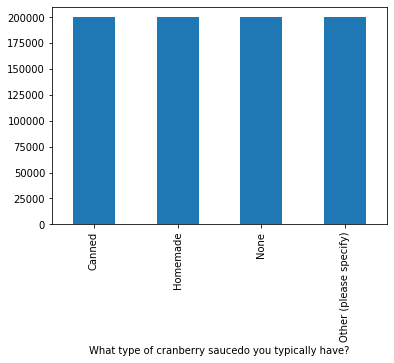

In [118]:
sauce['income'].plot(kind='bar')

### Aggregating with multiple columns

We can call groupby with multiple columns as input to get more granular groups. If we use the What type of cranberry sauce do you typically have? and What is typically the main dish at your Thanksgiving dinner? columns as input, we’ll be able to find the average income of people who eat Homemade cranberry sauce and Tofurkey, for example:

In [124]:
# Use .groupby() then get the np.mean()
data.columns[50:]

grouped = data.groupby(['Will you shop any Black Friday sales on Thanksgiving Day?', 'Have you ever tried to meet up with hometown friends on Thanksgiving night?'])
grouped.agg(np.mean)

RespondentID  \
Will you shop any Black Friday sales on Thanksg... Have you ever tried to meet up with hometown fr...                 
No                                                 No                                                  4.336711e+09   
                                                   Yes                                                 4.336764e+09   
Yes                                                No                                                  4.336742e+09   
                                                   Yes                                                 4.336838e+09   

                                                                                                         gender  \
Will you shop any Black Friday sales on Thanksg... Have you ever tried to meet up with hometown fr...             
No                                                 No                                                  0.564583   
                                                   Yes                                                 0.477551   
Yes                                                No                                                  0.651786   
                                                   Yes                                                 0.490909   

                                                                                                         income  
Will you shop any Black Friday sales on Thanksg... Have you ever tried to meet up with hometown fr...            
No                                                 No                                                  200000.0  
                                                   Yes                                                 200000.0  
Yes                                                No                                                  200000.0  
                                                   Yes                                                 200000.0

### Aggregating with multiple functions

We can also perform aggregation with multiple functions. This enables us to calculate the mean and standard deviation of a group, for example. In the below code, we find the sum, standard deviation, and mean of each group in the income column:

In [126]:
grouped["income"].agg([np.mean, np.sum, np.std]).head(10)

mean  \
Will you shop any Black Friday sales on Thanksg... Have you ever tried to meet up with hometown fr...             
No                                                 No                                                  200000.0   
                                                   Yes                                                 200000.0   
Yes                                                No                                                  200000.0   
                                                   Yes                                                 200000.0   

                                                                                                             sum  \
Will you shop any Black Friday sales on Thanksg... Have you ever tried to meet up with hometown fr...              
No                                                 No                                                  9000000.0   
                                                   Yes                                                 3800000.0   
Yes                                                No                                                  1200000.0   
                                                   Yes                                                 1200000.0   

                                                                                                       std  
Will you shop any Black Friday sales on Thanksg... Have you ever tried to meet up with hometown fr...       
No                                                 No                                                  0.0  
                                                   Yes                                                 0.0  
Yes                                                No                                                  0.0  
                                                   Yes                                                 0.0